# Exploratory Data Analysis for the CS229 Project

In [8]:
import numpy as np 
from embpred.config import DATA_DIR
import pandas as pd
from embpred.data.dataset import (get_basic_transforms, CustomImageDataset, get_data_from_dataset_csv, 
                            get_filename_no_ext, stratified_kfold_split, kfold_split,
                            load_mappings, get_class_names_by_label, 
                            get_transforms, get_embryo_names_by_from_files)
import matplotlib.pyplot as plt

In [7]:

# Restore class mappings
class_labels = {
    "t1": 0, "tPN": 1, "tPNf": 2, "t2": 3, "t3": 4, "t4": 5,
    "t5": 6, "t6": 7, "t7": 8, "t8": 9, "tM": 10, "tB": 11,
    "tEB": 12, "tEmpty": 13
}

# reverse mapping
labels_class = {v: k for k, v in class_labels.items()}
class_names = list(class_labels.keys())


In [30]:
dataset = DATA_DIR / 'curr_dataset.csv'
files, labels = get_data_from_dataset_csv(dataset)

[0 0 0 ... 2 2 2]


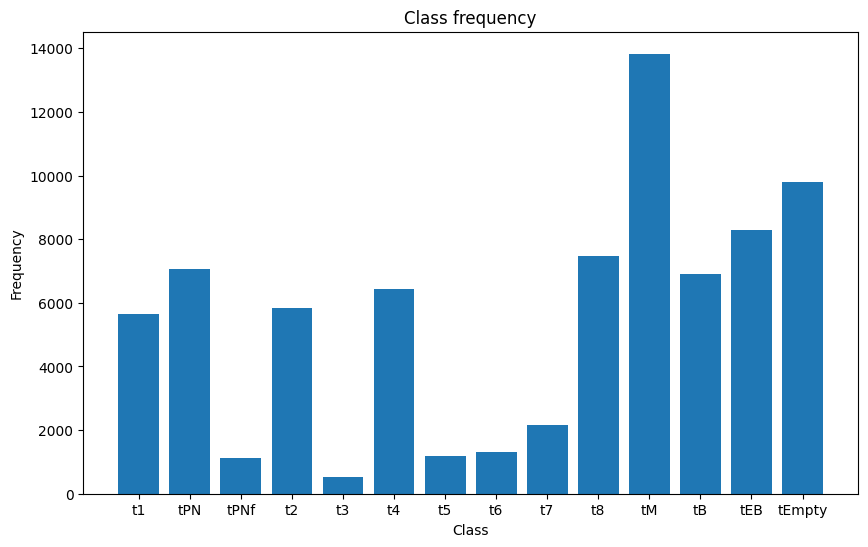

In [ ]:
# get the frequency of each class as a dictionary with class name as keys
labels_strings = [labels_class[l] for l in labels]
class_freq = {class_names[i]: labels_strings.count(class_names[i]) for i in range(len(class_names))}

# plot the frequency of each class
plt.figure(figsize=(10, 6))
plt.bar(class_freq.keys(), class_freq.values())
plt.title('Class frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.savefig('class_frequency.png')
plt.show()


In [62]:
print(class_freq)

{'t1': 5635, 'tPN': 7064, 'tPNf': 1127, 't2': 5838, 't3': 511, 't4': 6430, 't5': 1186, 't6': 1311, 't7': 2173, 't8': 7473, 'tM': 13830, 'tB': 6894, 'tEB': 8292, 'tEmpty': 9802}


In [32]:
embryo_names_to_files, embryo_names_to_count, embryo_names_to_labels = get_embryo_names_by_from_files(files, labels)

{'D2019.05.04_S00205_I3116_P_WELL3': 682, 'D2023.03.01_S00147_I4388_P_WELL2': 717, 'D2019.06.21_S00270_I3116_P_WELL4': 575, 'D2023.12.12_S00103_I4886_P_WELL3': 840, 'D2020.10.19_S00729_I0723_D_WELL3': 350, 'D2020.11.25_S01033_I3116_P_WELL2': 621, 'D2020.05.09_S00704_I3116_P_WELL2': 820, 'D2022.07.12_S02074_I3116_P_WELL8': 755, 'D2019.12.13_S00543_I3116_P_WELL7': 736, 'D2020.07.01_S00790_I3116_P_WELL8': 621, 'D2019.04.23_S00187_I3116_P_WELL13': 652, 'D2021.10.09_S01585_I3116_P_WELL4': 644, 'D2021.02.26_S01164_I3116_P_WELL5': 685, 'D2021.09.22_S01552_I3116_P_WELL3': 601, 'D2022.10.29_S02217_I3116_P_WELL4': 618, 'D2020.11.29_S01039_I3116_P_WELL1': 654, 'D2022.01.05_S01736_I3116_P_WELL4': 600, 'D2022.06.15_S02029_I3116_P_WELL4': 704, 'D2020.12.16_S01061_I3116_P_WELL5': 608, 'D2023.11.02_S02904_I3116_P_WELL8': 620, 'D2020.12.01_S01042_I3116_P_WELL8': 662, 'D2022.01.31_S01777_I3116_P_WELL3': 663, 'D2019.11.14_S00490_I3116_P_WELL11': 687, 'D2019.09.06_S00383_I3116_P_WELL5': 721, 'D2023.08.17_

Number of embryos: 122
Number of images: 77566
Median number of images per embryo: 643.0
Mean number of images per embryo: 635.7868852459017
Max number of images per embryo: 884
Min number of images per embryo: 105


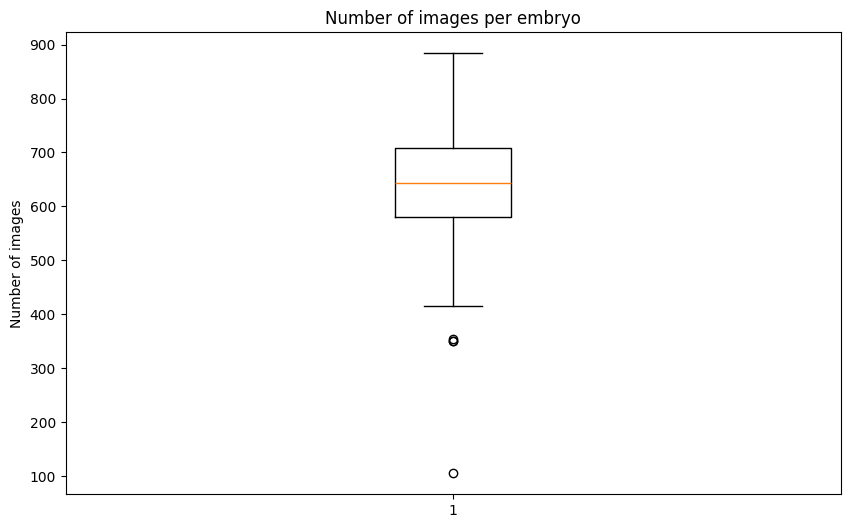

Number of outliers: 4
Outliers: ['D2020.10.19_S00729_I0723_D_WELL3', 'D2020.07.18_S00669_I0723_D_WELL1', 'D2022.07.31_S01125_I0723_D_WELL4', 'D2021.09.02_S01511_I3116_P_WELL9']
Number of embryos: 118
Number of images: 76407
Median number of images per embryo: 651.5
Mean number of images per embryo: 647.5169491525423
Max number of images per embryo: 884
Min number of images per embryo: 415


In [ ]:
print('Number of embryos:', len(embryo_names_to_files))
print('Number of images:', len(files))
print("Median number of images per embryo:", np.median(list(embryo_names_to_count.values())))
print("Mean number of images per embryo:", np.mean(list(embryo_names_to_count.values())))
print("Max number of images per embryo:", max(embryo_names_to_count.values()))
print("Min number of images per embryo:", min(embryo_names_to_count.values()))

# produce a boxplot of the number of images per embryo
plt.figure(figsize=(10, 6))
plt.boxplot(list(embryo_names_to_count.values()))
plt.title('Number of images per embryo')
plt.ylabel('Number of images')
plt.savefig('images_per_embryo.png')
plt.show()

# print number of outliers 
outliers = [embryo for embryo, count in embryo_names_to_count.items() if count < 400]
print('Number of outliers:', len(outliers))
print('Outliers:', outliers)

# remove outliers and recompute above statistics
embryo_names_to_count = {embryo: count for embryo, count in embryo_names_to_count.items() if count >= 400}
print('Number of embryos:', len(embryo_names_to_count))
print('Number of images:', sum(embryo_names_to_count.values()))
print("Median number of images per embryo:", np.median(list(embryo_names_to_count.values())))
print("Mean number of images per embryo:", np.mean(list(embryo_names_to_count.values()))
)
print("Max number of images per embryo:", max(embryo_names_to_count.values()))
print("Min number of images per embryo:", min(embryo_names_to_count.values()))  # 400


/var/folders/zw/x039kr6x13v1d173wnlv4fv80000gn/T/ipykernel_40865/3964667233.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(list(class_dist.values()), labels=class_dist.keys())


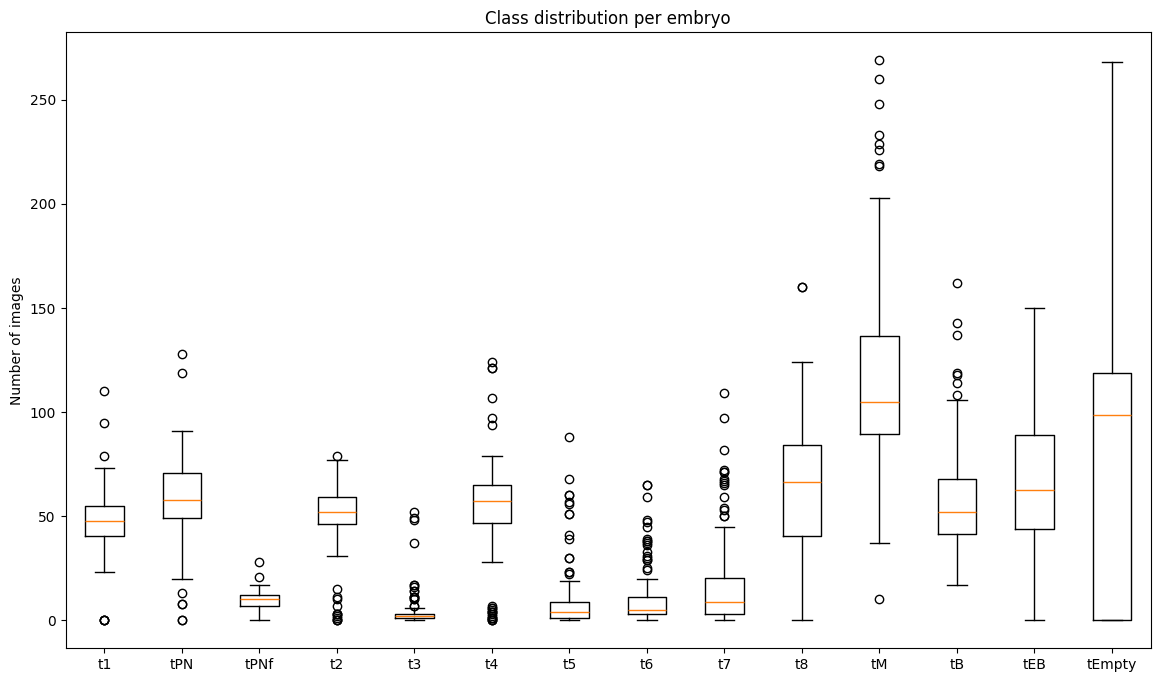

In [60]:
class_dist = {class_name: [] for class_name in class_names}

for embryo, count in embryo_names_to_count.items():
    per_embryo_class_count = {class_name: 0 for class_name in class_names}
    if embryo not in outliers:
        for i, label in enumerate(embryo_names_to_labels[embryo]):
            per_embryo_class_count[labels_class[label]] += 1
        for class_name, count in per_embryo_class_count.items():
            class_dist[class_name].append(count)
# for each key in class_dist, plot a boxplot of the values
plt.figure(figsize=(14, 8))
plt.boxplot(list(class_dist.values()), labels=class_dist.keys())
plt.title('Class distribution per embryo')
plt.ylabel('Number of images')
plt.savefig('class_distribution_per_embryo.png')
plt.show()


In [61]:
print(class_names)

['t1', 'tPN', 'tPNf', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 'tM', 'tB', 'tEB', 'tEmpty']


In [41]:
embryo_names = list(embryo_names_to_files.keys())

In [48]:
print(len(embryo_names_to_files[embryo_names[0]]))

#sorted(embryo_names_to_files[embryo_names[0]])
nums = []
for file in embryo_names_to_files[embryo_names[0]]:
    x = file.split("_")[-1].split("RUN")[1].split(".")[0]
    nums.append(int(x))
print(sorted(nums))

682
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

In [5]:
data = pd.read_csv(DATA_DIR / 'curr_dataset.csv')

In [6]:
data

,path,label
0,/home/berk/code/cfi-emb-pred/data/interim/cars...,0
1,/home/berk/code/cfi-emb-pred/data/interim/cars...,0
2,/home/berk/code/cfi-emb-pred/data/interim/cars...,0
3,/home/berk/code/cfi-emb-pred/data/interim/cars...,0
4,/home/berk/code/cfi-emb-pred/data/interim/cars...,0
...,...,...
77561,/home/berk/code/cfi-emb-pred/data/interim/cars...,2
77562,/home/berk/code/cfi-emb-pred/data/interim/cars...,2
77563,/home/berk/code/cfi-emb-pred/data/interim/cars...,2
77564,/home/berk/code/cfi-emb-pred/data/interim/cars...,2
